# Machel COVID-19 case plotter for Kybernum course

In [1]:
# Import Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

plt.style.use('seaborn-colorblind') #Sets chart style
plt.rcParams['axes.facecolor'] = '#faf5ef' #Sets chart background colour
plt.rc('figure', figsize=(9, 6))

## Contents


 1. [Introduction](#intro)
 2. [Argentina and its neighbours in the winter](#ARG_et_al)
 3. [Interactive chart 1 - Total cases and deaths for one country](#chart1)
 4. [Interactive chart 2 - Total cases and deaths for two countries](#chart2)
 5. [Interactive chart 3 - Total cases for n countries](#chart3)

## Introduction <a id='intro'></a>
This notebook is meant to allow an examination of COVID-19 data. The data used come from [Our World in Data](https://ourworldindata.org/coronavirus-data-explorer?hideControls=true&yScale=log&zoomToSelection=true&minPopulationFilter=1000000&casesMetric=true&dailyFreq=true&aligned=true&smoothing=7&country=), who in turn use the European Centre for Disease Prevention and Control (ECDC) as their underlying source.

### Importing and exploring the data
In this section the COVID-19 data is imported.

In [2]:
#import data
covid = pd.read_csv('https://covid.ourworldindata.org/data/ecdc/full_data.csv')

In [3]:
covid.shape

(59354, 10)

In [4]:
covid

date     location  new_cases  new_deaths  total_cases  \
0      2019-12-31  Afghanistan        0.0         0.0          NaN   
1      2020-01-01  Afghanistan        0.0         0.0          NaN   
2      2020-01-02  Afghanistan        0.0         0.0          NaN   
3      2020-01-03  Afghanistan        0.0         0.0          NaN   
4      2020-01-04  Afghanistan        0.0         0.0          NaN   
...           ...          ...        ...         ...          ...   
59349  2020-11-25     Zimbabwe       90.0         1.0       9398.0   
59350  2020-11-26     Zimbabwe      110.0         0.0       9508.0   
59351  2020-11-27     Zimbabwe      115.0         0.0       9623.0   
59352  2020-11-28     Zimbabwe       91.0         1.0       9714.0   
59353  2020-11-29     Zimbabwe      108.0         0.0       9822.0   

       total_deaths  weekly_cases  weekly_deaths  biweekly_cases  \
0               NaN           NaN            NaN             NaN   
1               NaN           NaN            NaN             NaN   
2               NaN           NaN            NaN             NaN   
3               NaN           NaN            NaN             NaN   
4               NaN           NaN            NaN             NaN   
...             ...           ...            ...             ...   
59349         274.0         453.0           14.0           788.0   
59350         274.0         527.0           13.0           841.0   
59351         274.0         577.0            9.0           927.0   
59352         275.0         594.0           10.0           949.0   
59353         275.0         650.0           10.0          1036.0   

       biweekly_deaths  
0                  NaN  
1                  NaN  
2                  NaN  
3                  NaN  
4                  NaN  
...                ...  
59349             19.0  
59350             19.0  
59351             19.0  
59352             18.0  
59353             18.0  

[59354 rows x 10 columns]

In [5]:
covid.dtypes

date                object
location            object
new_cases          float64
new_deaths         float64
total_cases        float64
total_deaths       float64
weekly_cases       float64
weekly_deaths      float64
biweekly_cases     float64
biweekly_deaths    float64
dtype: object

In [6]:
covid.describe()

new_cases    new_deaths   total_cases  total_deaths  weekly_cases  \
count   59021.000000  59021.000000  5.605100e+04  4.641400e+04  5.822200e+04   
mean     2110.111604     49.252978  1.862250e+05  7.278976e+03  1.455184e+04   
std     19951.023265    411.828590  1.885282e+06  5.923431e+04  1.365011e+05   
min     -8261.000000  -1918.000000  1.000000e+00  1.000000e+00 -3.864000e+03   
25%         0.000000      0.000000  1.900000e+02  1.400000e+01  7.000000e+00   
50%        15.000000      0.000000  2.319000e+03  9.300000e+01  1.430000e+02   
75%       256.000000      4.000000  2.583750e+04  8.020000e+02  1.888000e+03   
max    679758.000000  12583.000000  6.227103e+07  1.453531e+06  4.182966e+06   

       weekly_deaths  biweekly_cases  biweekly_deaths  
count   58222.000000    5.671700e+04     56717.000000  
mean      341.875751    2.886393e+04       684.477088  
std      2779.184258    2.679244e+05      5499.683987  
min     -1625.000000   -9.050000e+02     -1616.000000  
25%         0.000000    1.700000e+01         0.000000  
50%         2.000000    3.140000e+02         4.000000  
75%        31.000000    3.839000e+03        64.000000  
max     71978.000000    8.302092e+06    139209.000000

In [7]:
#Sets country name as index
covid = covid.set_index('location')

In [13]:
#Creates a new series with datetime data from the series "date".
covid['dates'] = pd.to_datetime(covid.date)

In [14]:
covid.head()

date  new_cases  new_deaths  total_cases  total_deaths  \
location                                                                    
Afghanistan  2019-12-31        0.0         0.0          NaN           NaN   
Afghanistan  2020-01-01        0.0         0.0          NaN           NaN   
Afghanistan  2020-01-02        0.0         0.0          NaN           NaN   
Afghanistan  2020-01-03        0.0         0.0          NaN           NaN   
Afghanistan  2020-01-04        0.0         0.0          NaN           NaN   

             weekly_cases  weekly_deaths  biweekly_cases  biweekly_deaths  \
location                                                                    
Afghanistan           NaN            NaN             NaN              NaN   
Afghanistan           NaN            NaN             NaN              NaN   
Afghanistan           NaN            NaN             NaN              NaN   
Afghanistan           NaN            NaN             NaN              NaN   
Afghanistan           NaN            NaN             NaN              NaN   

                 dates  
location                
Afghanistan 2019-12-31  
Afghanistan 2020-01-01  
Afghanistan 2020-01-02  
Afghanistan 2020-01-03  
Afghanistan 2020-01-04

In [17]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59354 entries, Afghanistan to Zimbabwe
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             59354 non-null  object        
 1   new_cases        59021 non-null  float64       
 2   new_deaths       59021 non-null  float64       
 3   total_cases      56051 non-null  float64       
 4   total_deaths     46414 non-null  float64       
 5   weekly_cases     58222 non-null  float64       
 6   weekly_deaths    58222 non-null  float64       
 7   biweekly_cases   56717 non-null  float64       
 8   biweekly_deaths  56717 non-null  float64       
 9   dates            59354 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(8), object(1)
memory usage: 5.0+ MB


In [18]:
# This produces an array with each country name
covid.index.unique()

Index(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Anguilla',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       ...
       'Vanuatu', 'Vatican', 'Venezuela', 'Vietnam', 'Wallis and Futuna',
       'Western Sahara', 'World', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', name='location', length=215)

In [19]:
covid.index.value_counts()

Finland                 335
United Arab Emirates    335
Dominican Republic      335
India                   335
Switzerland             335
                       ... 
International            71
Solomon Islands          45
Wallis and Futuna        44
Marshall Islands         32
Vanuatu                  19
Name: location, Length: 215, dtype: int64

In [23]:
# This code cell can be used to search for which countries are included in the dataset using part of their name
x = input('Enter part or all of the country name:')
UC = covid.index.unique()
UC[UC.str.contains(x)]

Enter part or all of the country name: 


Index(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Anguilla',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       ...
       'Vanuatu', 'Vatican', 'Venezuela', 'Vietnam', 'Wallis and Futuna',
       'Western Sahara', 'World', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', name='location', length=215)

### Findings
After importing and a bit of exploring it is found that the data include daily, weekly and biweekly COVID-19 cases and deaths for 215 countries and territories in the world over the time period 31 December 2019 to 29 November 2020.

## Argentina and its neighbours in the winter <a id='ARG_et_al'></a>

This code cell produces a chart of total cases for Argentina, Chile, Bolivia, Paraguay, Brazil and Uruguay during the winter months (June 21 to September 21).

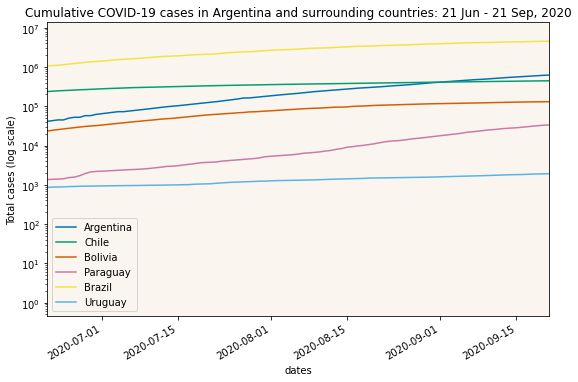

In [15]:
SA=['Argentina','Chile','Bolivia','Paraguay','Brazil','Uruguay']

axes = covid.loc[SA[0]].plot('dates', 'total_cases', label = 'Argentina')
[covid.loc[i].plot('dates', 'total_cases', label = i, ax = axes) for i in SA[1:]]
axes.set_xlim([datetime.date(2020, 6, 21), datetime.date(2020, 9, 21)]) #sets the time range

plt.title('Cumulative COVID-19 cases in Argentina and surrounding countries: 21 Jun - 21 Sep, 2020')
plt.ylabel('Total cases (log scale)')
plt.yscale('log') # applies logarithmic scale to the y-axis
plt.savefig('Argentina et al.png')

### Interactive chart 1 - Total cases and deaths for one country <a id='chart1'></a>
This code allows for the input of one country and produces one line chart, with series for the total cases and total deaths from COVID-19.


Enter country: Colombia
Enter start date (including the year): 07/08/2020
Enter end date (including the year): 08/08/2020


AxesSubplot(0.125,0.2;0.775x0.68)


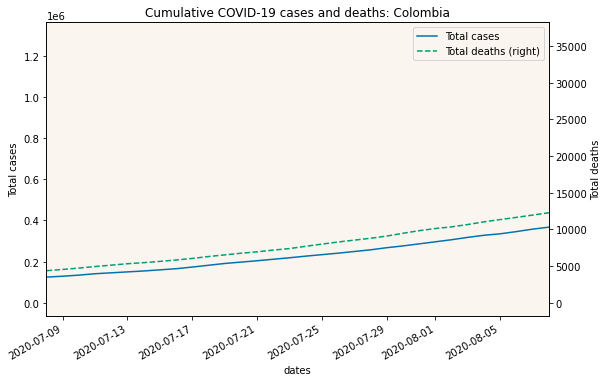

In [26]:
#Working exceptions. Build on this for the final chart

c1 = []
c1 = input("Enter country:")

dd1 = input('Enter start date (including the year):')
dd2 = input('Enter end date (including the year):')

 
def chart1(c1,dd1,dd2):
    axes = covid.loc[c1].plot('dates', 'total_cases', label = 'Total cases')
    plt.ylabel('Total cases')
    
    covid.loc[c1].plot('dates', 'total_deaths', label = 'Total deaths', linestyle = '--', ax = axes, secondary_y=True)
    plt.ylabel('Total deaths')
    axes.set_xlim([dd1, dd2]) #sets the time range
        
    plt.title(f'Cumulative COVID-19 cases and deaths: {c1}')
    
    #plt.yscale('log') # applies logarithmic scale to the y-axis
        
    return axes

try:
    print(chart1(c1,dd1,dd2))
except KeyError:
    print("Whoops! You may have entered the country name incorrectly. Make sure your spelling and capitalization are correct. To search for available countries, check the last code cell in the introduction section.")
except TypeError:
    print("Hmmm. You may have entered the dates incorrectly. You can try again with a more appropriate format, but for now lets take a look at the entire range :)")
except Exception:
    print ("Hmmm....I'm not exactly sure what happened. Maybe you should try again.")
 

### Interactive chart 2 - Total cases and deaths for two countries <a id='chart2'></a>
This code allows for the input of two countries and produces one line chart for each country, with series for the total cases and total deaths from COVID-19.

Enter country 1: Barbados
Enter country 2: Jamaica
Enter start date (including the year): 07/08/2020
Enter end date (including the year): 08/08/2020


None


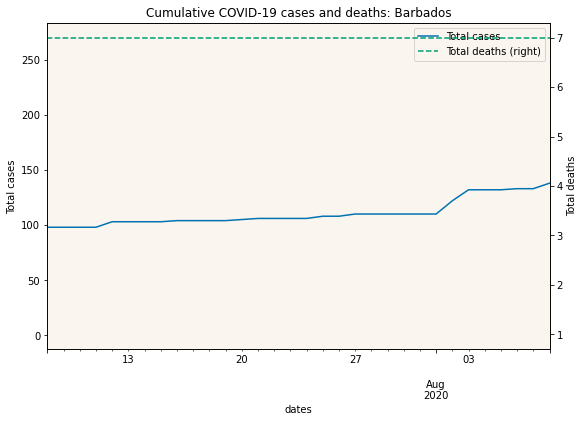

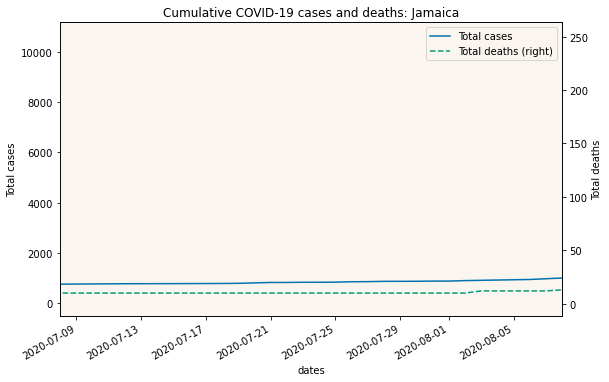

In [27]:
c1 = input("Enter country 1:")
c2 = input("Enter country 2:")

dd1 = input('Enter start date (including the year):')
dd2 = input('Enter end date (including the year):')


def chart(c1,c2,dd1,dd2):
    # Country 1 chart
    axes1 = covid.loc[c1].plot('dates', 'total_cases', label = 'Total cases')
    plt.ylabel('Total cases')
    
    covid.loc[c1].plot('dates', 'total_deaths', label = 'Total deaths', linestyle = '--', ax = axes1, secondary_y=True)
    plt.ylabel('Total deaths')
    axes1.set_xlim([dd1, dd2]) #sets the time range
    
    plt.title(f'Cumulative COVID-19 cases and deaths: {c1}')
    
    # Country 2 chart
    axes2 = covid.loc[c2].plot('dates', 'total_cases', label = 'Total cases')
    plt.ylabel('Total cases')
    
    covid.loc[c2].plot('dates', 'total_deaths', label = 'Total deaths', linestyle = '--', ax = axes2, secondary_y=True)
    plt.ylabel('Total deaths')
    axes2.set_xlim([dd1, dd2]) #sets the time range
    
    
    plt.title(f'Cumulative COVID-19 cases and deaths: {c2}')
    #plt.yscale('log') # applies logarithmic scale to the y-axis
    
    return

try:
    print(chart(c1,c2,dd1,dd2))
except KeyError:
    print("Whoops! You may have entered the country name incorrectly. Make sure your spelling and capitalization are correct. To search for available countries, check the last code cell in the introduction section.")
except TypeError:
    print("Hmmm. You may have entered the dates incorrectly. You can try again with a more appropriate format, but for now lets take a look at the entire range :)")
except Exception:
    print ("Hmmm....I'm not exactly sure what happened. Maybe you should try again.")

### Interactive chart 3 - Number of cases for n countries on a logarithmic scale. <a id='chart3'></a>
This code allows for the input of n countries and produces one line chart, with the total cases series for each country.

Enter countries. Use just a comma between them: Japan,Singapore,Vietnam
Enter start date (including the year): Jan 1 2020
Enter end date (including the year): Dec 1 2020


AxesSubplot(0.125,0.125;0.775x0.755)


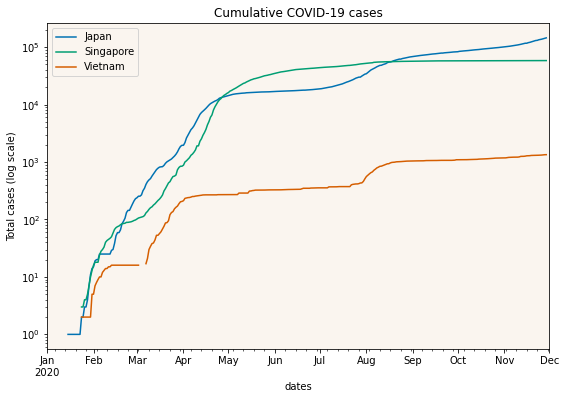

In [18]:
co=[]

co=input("Enter countries. Use just a comma between them:")
c2=co.split(',')

dd1 = input('Enter start date (including the year):')
dd2 = input('Enter end date (including the year):')
  
    
def chart(c2,dd1,dd2):
    axes = covid.loc[c2[0]].plot('dates', 'total_cases', label = c2[0])
    [covid.loc[i].plot('dates', 'total_cases', label = i, ax = axes) for i in c2[1:]] # A list comprehension is used to plot all the countries from the 2nd to the nth
    axes.set_xlim([dd1, dd2]) #sets the time range
    
    plt.ylabel('Total cases (log scale)')
    plt.yscale('log') # applies logarithmic scale to the y-axis
    plt.title('Cumulative COVID-19 cases')
    
    return axes

try:
    print(chart(c2,dd1,dd2))
except KeyError:
    print("Whoops! You may have entered the country name(s) incorrectly. Make sure your spelling and capitalization are correct, with just commas between the country names. To search for available countries, check the last code cell in the introduction section.")
except TypeError:
    print("Hmmm. You may have entered the dates incorrectly. You can try again with a more appropriate format, but for now lets take a look at the entire range :)")
except Exception:
    print ("Hmmm....I'm not exactly sure what happened. Maybe you should try again.")

## <span style="color:red"> Finally, Season's Greetings!!! </span>

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('gj2amFEqxW4')